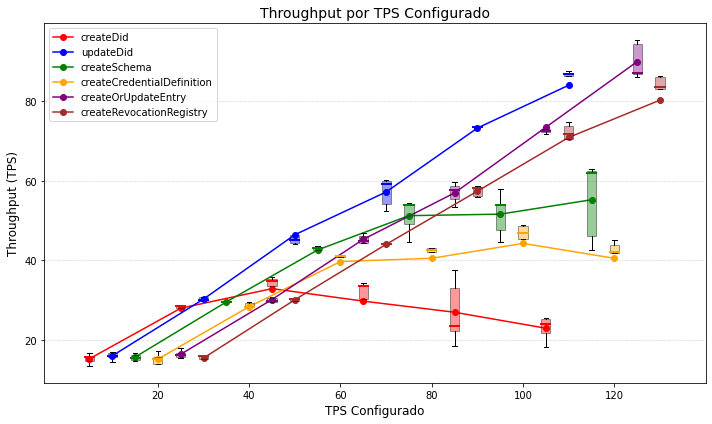

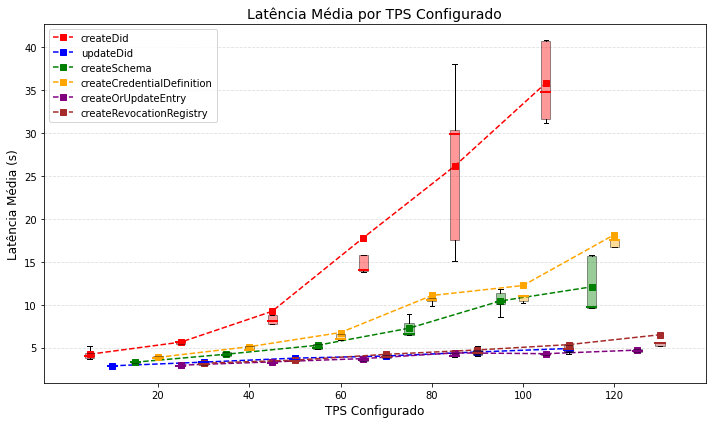

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =================== CONFIGURÁVEL ===================
functions_to_compare = [
    {"script_name": "createDid", "path": "./reports/createDid/createDid_summary_metrics.csv", "color": "red"},
    {"script_name": "updateDid", "path": "./reports/updateDid/updateDid_summary_metrics.csv", "color": "blue"},
    {"script_name": "createSchema", "path": "./reports/createSchema/createSchema_summary_metrics.csv", "color": "green"},
    {"script_name": "createCredentialDefinition", "path": "./reports/createCredentialDefinition/createCredentialDefinition_summary_metrics.csv", "color": "orange"},
    {"script_name": "createOrUpdateEntry", "path": "./reports/createOrUpdateEntry/createOrUpdateEntry_summary_metrics.csv", "color": "purple"},
    {"script_name": "createRevocationRegistry", "path": "./reports/createRevocationRegistry/createRevocationRegistry_summary_metrics.csv", "color": "brown"},
]
# ====================================================

# Carrega os DataFrames
dataframes = []
for func in functions_to_compare:
    df = pd.read_csv(func["path"])
    df["Function"] = func["script_name"]
    dataframes.append(df)

# Combina todos os dados
combined_df = pd.concat(dataframes, ignore_index=True)

# Define a ordem dos TPS
ordered_tps = sorted(combined_df['ConfiguredTPS'].dropna().unique())

# ===================== THROUGHPUT =====================
plt.figure(figsize=(10, 6))
offset_step = 0.25

for idx, func in enumerate(functions_to_compare):
    df = combined_df[combined_df["Function"] == func["script_name"]]
    throughput_data = [df[df['ConfiguredTPS'] == tps]['Throughput'] for tps in ordered_tps]
    position_offset = (idx - len(functions_to_compare)//2) * offset_step
    plt.boxplot(
        throughput_data,
        positions=np.arange(len(ordered_tps)) + position_offset,
        widths=0.10,
        patch_artist=True,
        boxprops=dict(facecolor=func["color"], alpha=0.4),
        medianprops=dict(color=func["color"], linewidth=2),
        showfliers=False
    )
    mean_throughput = [np.mean(data) if len(data) > 0 else np.nan for data in throughput_data]
    plt.plot(np.arange(len(ordered_tps)) + position_offset, mean_throughput,
             linestyle='-', marker='o', color=func["color"], label=func["script_name"])

plt.xticks(ticks=np.arange(len(ordered_tps)), labels=ordered_tps)
plt.title('Throughput por TPS Configurado', fontsize=14)
plt.xlabel('TPS Configurado', fontsize=12)
plt.ylabel('Throughput (TPS)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("grafico_throughput_tps.png", dpi=300)
plt.show()

# ===================== LATÊNCIA =====================
plt.figure(figsize=(10, 6))

for idx, func in enumerate(functions_to_compare):
    df = combined_df[combined_df["Function"] == func["script_name"]]
    latency_data = [df[df['ConfiguredTPS'] == tps]['AvgLatency'] for tps in ordered_tps]
    position_offset = (idx - len(functions_to_compare)//2) * offset_step
    plt.boxplot(
        latency_data,
        positions=np.arange(len(ordered_tps)) + position_offset,
        widths=0.10,
        patch_artist=True,
        boxprops=dict(facecolor=func["color"], alpha=0.4),
        medianprops=dict(color=func["color"], linewidth=2),
        showfliers=False
    )
    mean_latency = [np.mean(data) if len(data) > 0 else np.nan for data in latency_data]
    plt.plot(np.arange(len(ordered_tps)) + position_offset, mean_latency,
             linestyle='--', marker='s', color=func["color"], label=func["script_name"])

plt.xticks(ticks=np.arange(len(ordered_tps)), labels=ordered_tps)
plt.title('Latência Média por TPS Configurado', fontsize=14)
plt.xlabel('TPS Configurado', fontsize=12)
plt.ylabel('Latência Média (s)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.savefig("grafico_latency_tps.png", dpi=300)
plt.show()
